In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u402-ga-2ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2024-04-27 14:26:52--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.4’

spark-3.2.1-bin-had 100%[===================>] 260.01M  20.1MB/s    in 14s     

2024-04-27 14:27:07 (18.5 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.4’ saved [272637746/272637746]



In [ ]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()


In [ ]:
spark

In [ ]:
import pyspark
import numpy as np
import pandas as pd

In [ ]:
# data
file_path = 'sample_data/diabetes.csv'
data = pd.read_csv(file_path)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
#Pre=Processing: 1: Missing value

print(data.isnull().sum())

data.fillna(data.median(), inplace=True)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


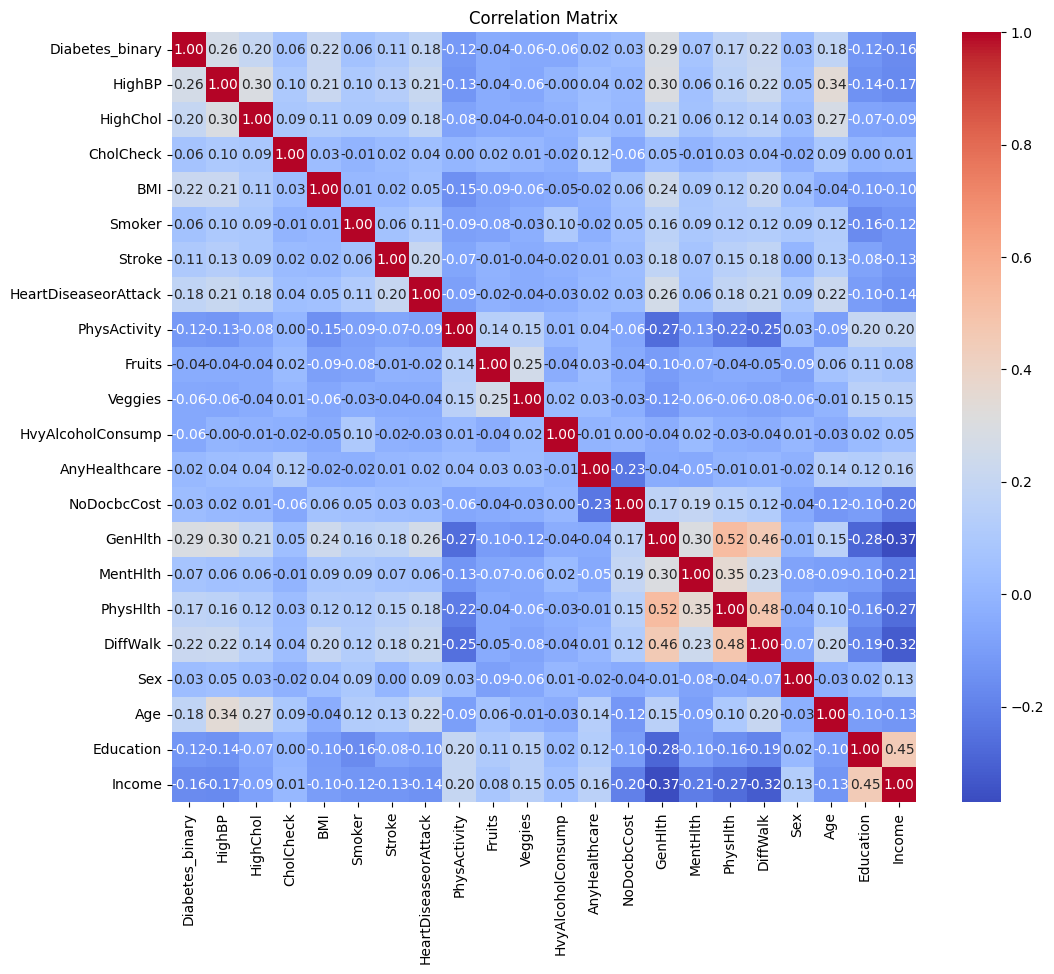

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-65-383c40812e66>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

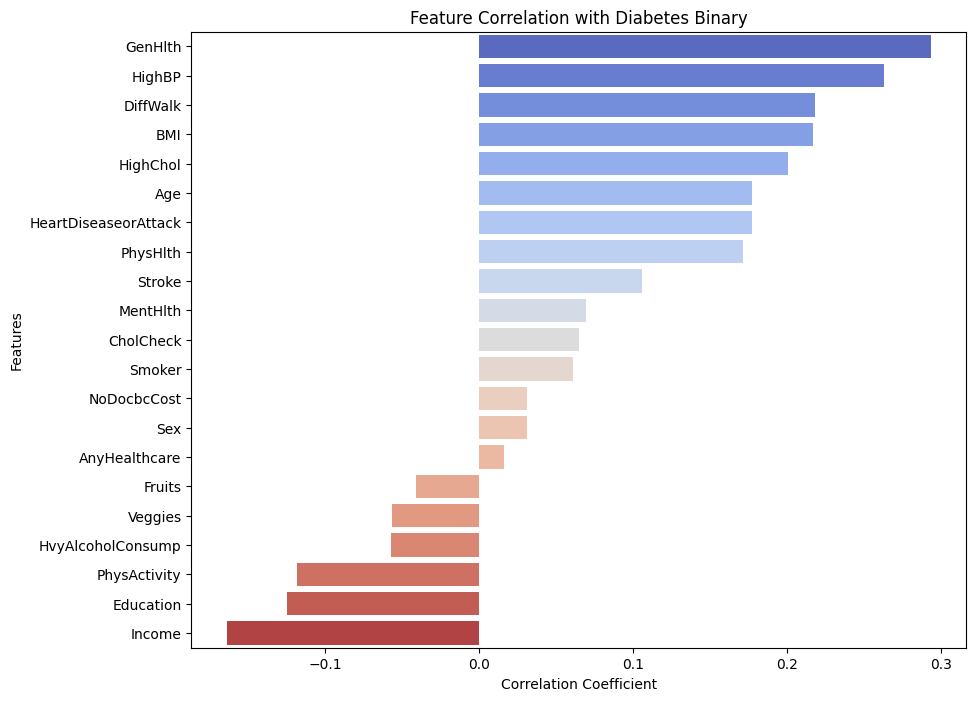

In [ ]:
# correlation with
correlation_series = data.corr()['Diabetes_binary'].sort_values(ascending=False)

correlation_series = correlation_series.drop('Diabetes_binary')

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_series.values, y=correlation_series.index, palette='coolwarm')
plt.title('Feature Correlation with Diabetes Binary')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


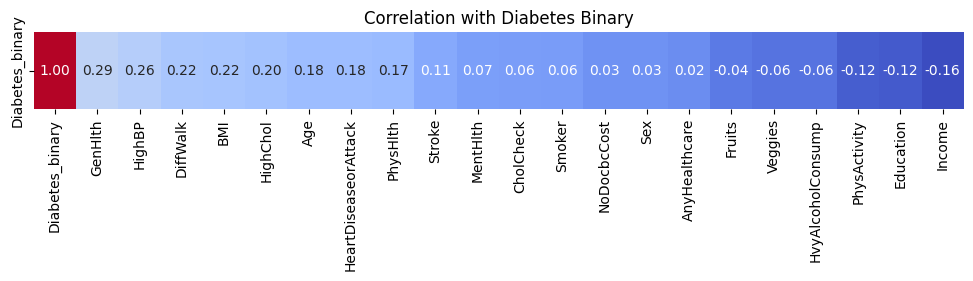

In [ ]:
plt.figure(figsize=(12, 1))
sns.heatmap(data.corr()[['Diabetes_binary']].sort_values(by='Diabetes_binary', ascending=False).T,
            annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
plt.title('Correlation with Diabetes Binary')
plt.show()


<ipython-input-67-11e379d3ed54>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_binary', y=feature, data=data, ax=axs[i], palette='bwr')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

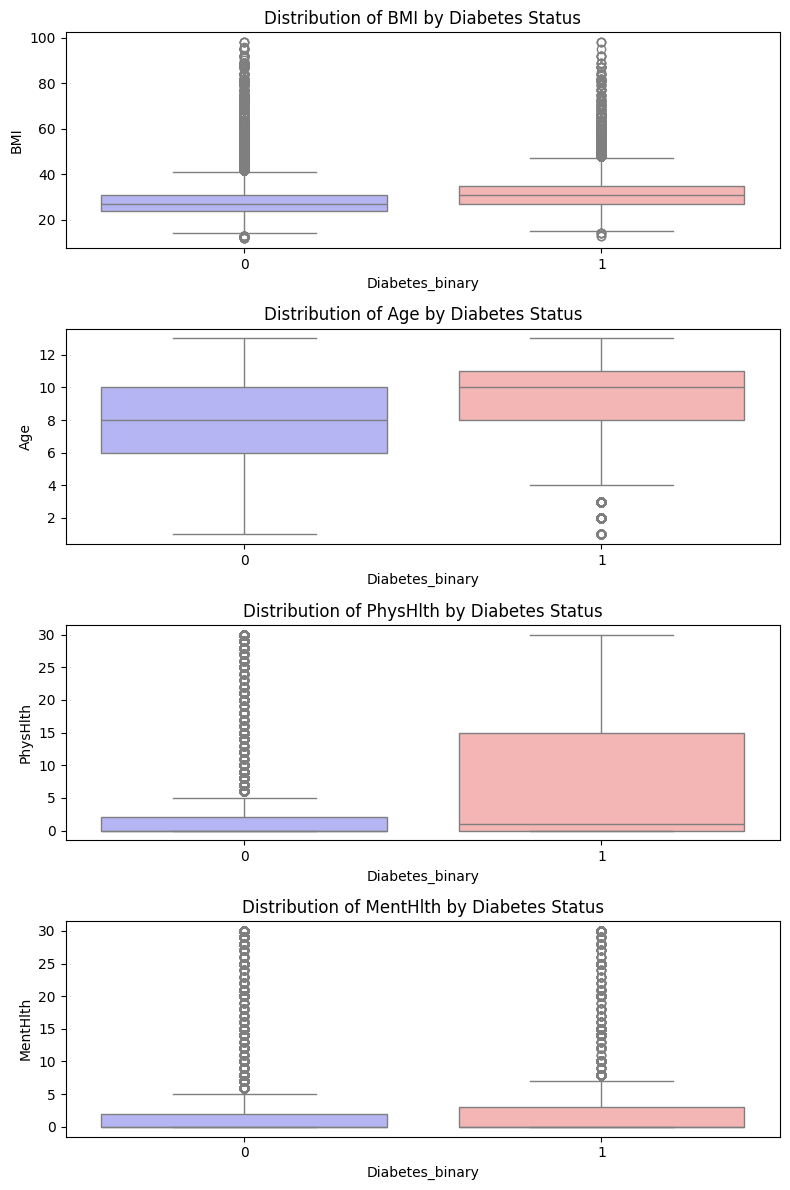

In [ ]:
# Plotting box plots
features = ['BMI', 'Age', 'PhysHlth', 'MentHlth']
fig, axs = plt.subplots(nrows=len(features), figsize=(8, 12))
for i, feature in enumerate(features):
    sns.boxplot(x='Diabetes_binary', y=feature, data=data, ax=axs[i], palette='bwr')
    axs[i].set_title(f'Distribution of {feature} by Diabetes Status')
plt.tight_layout()
plt.show()


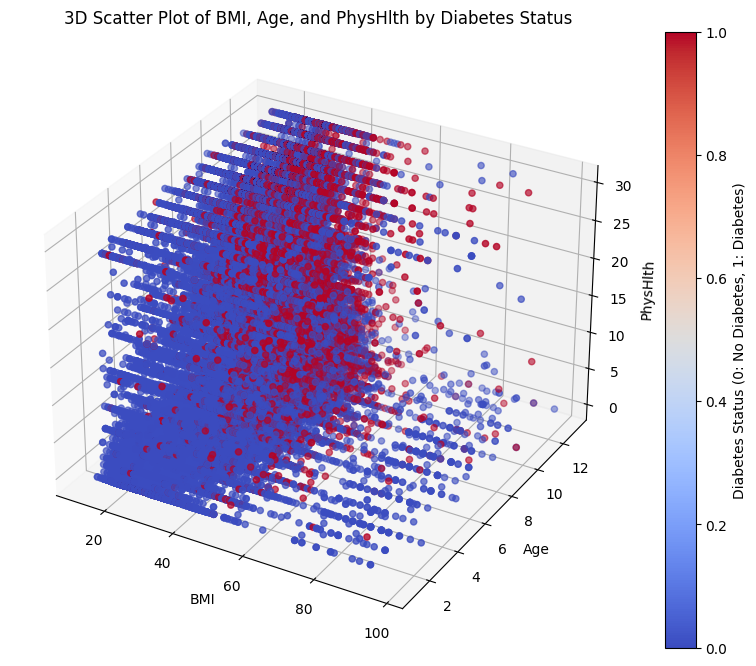

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(data['BMI'], data['Age'], data['PhysHlth'], c=data['Diabetes_binary'], cmap='coolwarm')
ax.set_xlabel('BMI')
ax.set_ylabel('Age')
ax.set_zlabel('PhysHlth')
plt.title('3D Scatter Plot of BMI, Age, and PhysHlth by Diabetes Status')
plt.colorbar(sc, label='Diabetes Status (0: No Diabetes, 1: Diabetes)')
plt.show()



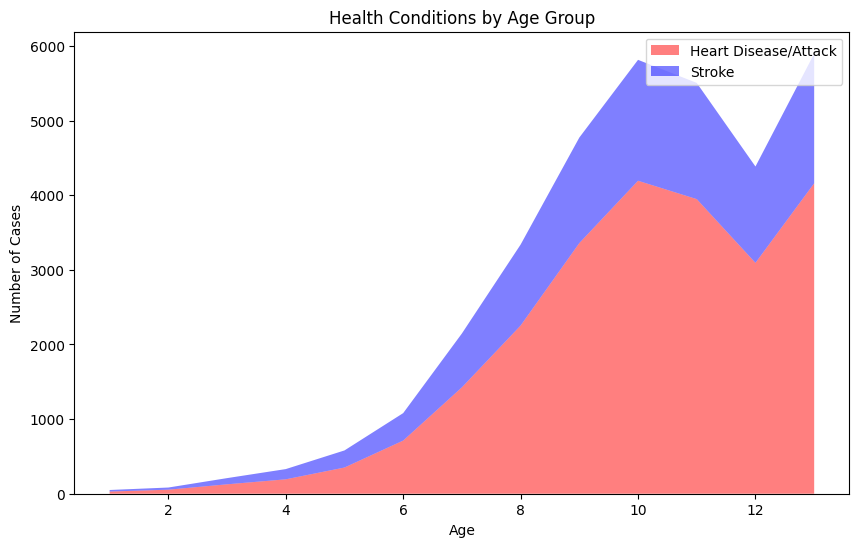

In [ ]:
import numpy as np

age_group = data.groupby('Age').agg({'HeartDiseaseorAttack': 'sum', 'Stroke': 'sum'})

plt.figure(figsize=(10, 6))
plt.stackplot(age_group.index, age_group['HeartDiseaseorAttack'], age_group['Stroke'], labels=['Heart Disease/Attack', 'Stroke'], colors=['red', 'blue'], alpha=0.5)
plt.title('Health Conditions by Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.legend(loc='upper right')
plt.show()


<ipython-input-70-92021ffd6087>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y='BMI', data=data, inner='quartile', palette='muted')


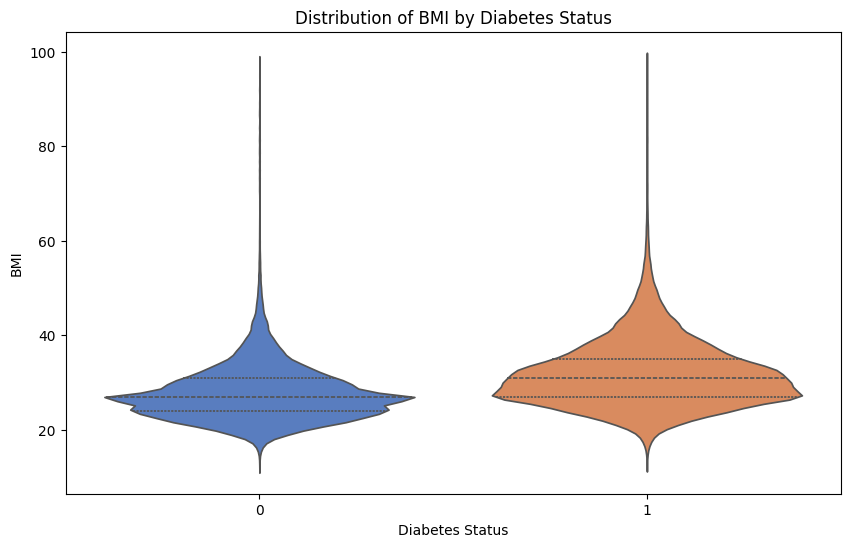

<ipython-input-70-92021ffd6087>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y='Age', data=data, inner='quartile', palette='muted')


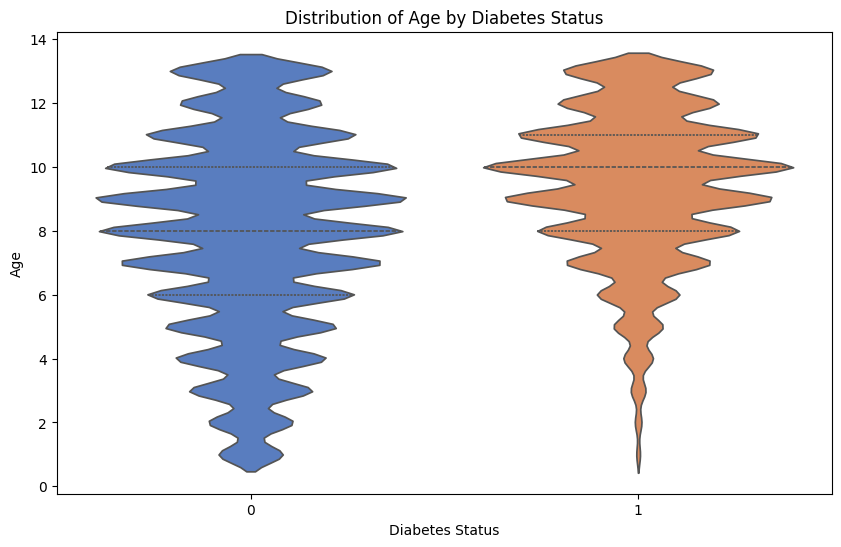

In [ ]:
# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_binary', y='BMI', data=data, inner='quartile', palette='muted')
plt.title('Distribution of BMI by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.show()

# Violin plot for Age by Diabetes Status
plt.figure(figsize=(10, 6))
sns.violinplot(x='Diabetes_binary', y='Age', data=data, inner='quartile', palette='muted')
plt.title('Distribution of Age by Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')
plt.show()


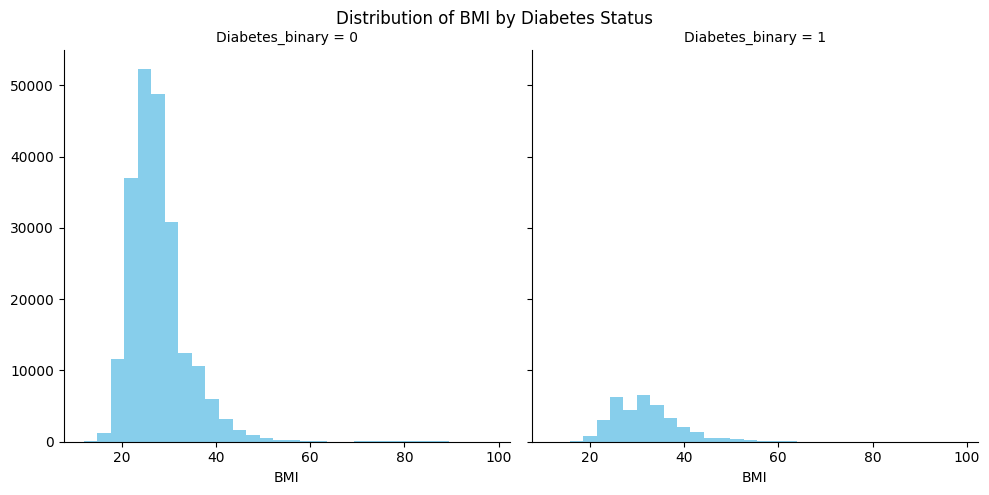

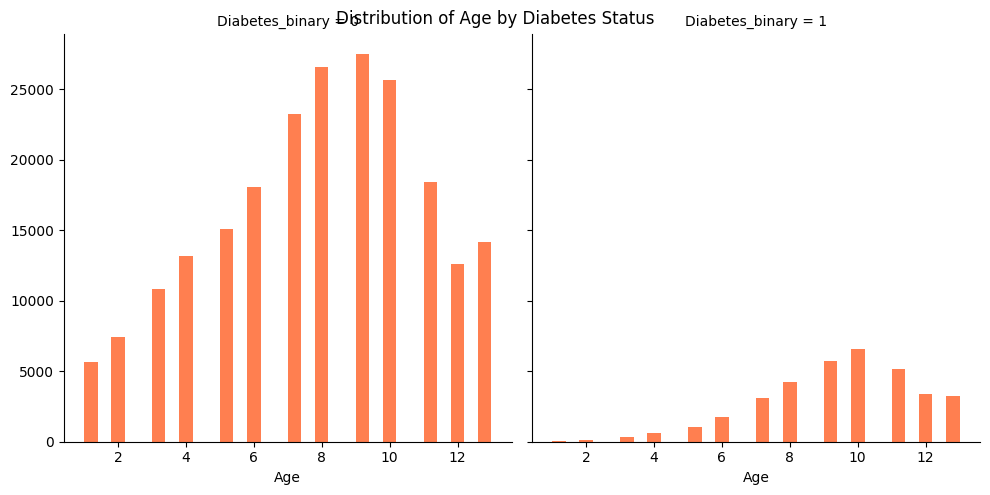

In [ ]:
# Faceted histograms for BMI
g = sns.FacetGrid(data, col='Diabetes_binary', height=5, aspect=1)
g.map(plt.hist, 'BMI', bins=30, color='skyblue')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of BMI by Diabetes Status')
plt.show()

# Faceted histograms for Age
g = sns.FacetGrid(data, col='Diabetes_binary', height=5, aspect=1)
g.map(plt.hist, 'Age', bins=30, color='coral')
g.fig.suptitle('Distribution of Age by Diabetes Status')
plt.show()


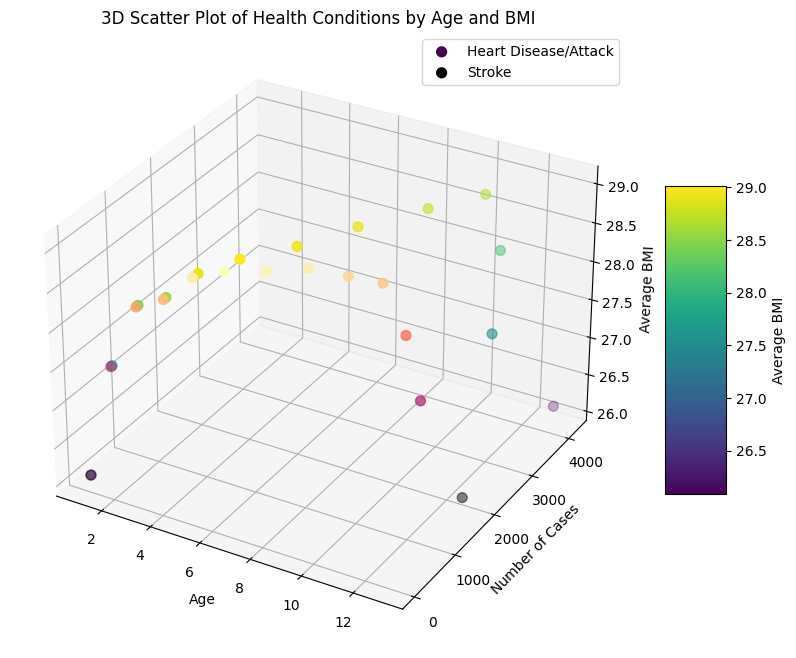

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

grouped_data = data.groupby('Age').agg({'HeartDiseaseorAttack': 'sum',
                                        'Stroke': 'sum',
                                        'BMI': 'mean', # Or use 'Smoker': 'mean' for average smoking status
                                        }).reset_index()

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the number of heart disease/attack cases against age, colored by average BMI
scatter = ax.scatter(grouped_data['Age'], grouped_data['HeartDiseaseorAttack'], grouped_data['BMI'],
                     c=grouped_data['BMI'], cmap='viridis', label='Heart Disease/Attack', s=50)


cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Average BMI')

# Plotting the number of stroke cases against age, colored by average BMI
scatter = ax.scatter(grouped_data['Age'], grouped_data['Stroke'], grouped_data['BMI'],
                     c=grouped_data['BMI'], cmap='magma', label='Stroke', s=50)

# Setting labels
ax.set_xlabel('Age')
ax.set_ylabel('Number of Cases')
ax.set_zlabel('Average BMI')


plt.title('3D Scatter Plot of Health Conditions by Age and BMI')
plt.legend()

# Show plot
plt.show()


In [ ]:
#Classification : Decision tree
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
        .appName("Diabetes Decision Tree Classifier") \
        .getOrCreate()


In [ ]:
from pyspark.sql import DataFrame

file_path = 'sample_data/diabetes.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

data.printSchema()
data.describe().show()


root
 |-- Diabetes_binary: integer (nullable = true)
 |-- HighBP: integer (nullable = true)
 |-- HighChol: integer (nullable = true)
 |-- CholCheck: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- Smoker: integer (nullable = true)
 |-- Stroke: integer (nullable = true)
 |-- HeartDiseaseorAttack: integer (nullable = true)
 |-- PhysActivity: integer (nullable = true)
 |-- Fruits: integer (nullable = true)
 |-- Veggies: integer (nullable = true)
 |-- HvyAlcoholConsump: integer (nullable = true)
 |-- AnyHealthcare: integer (nullable = true)
 |-- NoDocbcCost: integer (nullable = true)
 |-- GenHlth: integer (nullable = true)
 |-- MentHlth: integer (nullable = true)
 |-- PhysHlth: integer (nullable = true)
 |-- DiffWalk: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Education: integer (nullable = true)
 |-- Income: integer (nullable = true)

+-------+-------------------+------------------+-------------------+---------

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

feature_columns = [col for col in data.columns if col != 'Diabetes_binary']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Decision Tree classifier model
dt_classifier = DecisionTreeClassifier(labelCol="Diabetes_binary", featuresCol="features")

# a pipeline
pipeline = Pipeline(stages=[assembler, dt_classifier])

# Train the model
dt_model = pipeline.fit(train_data)


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#
predictions = dt_model.transform(test_data)

# Evaluate the model using the binary classification evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Diabetes_binary")
auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

print(f"The AUC for the Decision Tree model is: {auc}")


The AUC for the Decision Tree model is: 0.47561236080395997


In [ ]:
# Print the Decision Tree model
tree_model = dt_model.stages[-1]
print(tree_model.toDebugString)


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_f443ff5b78a2, depth=5, numNodes=11, numClasses=2, numFeatures=21
  If (feature 0 <= 0.5)
   Predict: 0.0
  Else (feature 0 > 0.5)
   If (feature 13 <= 3.5)
    Predict: 0.0
   Else (feature 13 > 3.5)
    If (feature 3 <= 27.5)
     Predict: 0.0
    Else (feature 3 > 27.5)
     If (feature 1 <= 0.5)
      Predict: 0.0
     Else (feature 1 > 0.5)
      If (feature 3 <= 34.5)
       Predict: 0.0
      Else (feature 3 > 34.5)
       Predict: 1.0



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_binary", predictionCol="prediction", metricName="accuracy")


accuracy = accuracy_evaluator.evaluate(predictions)

print(f"The model achieved an accuracy of {accuracy * 100:.2f}%.")


The model achieved an accuracy of 86.50%.


In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = predictions.select(['prediction', 'Diabetes_binary']).rdd.map(lambda lp: (float(lp.prediction), float(lp.Diabetes_binary)))

# Instantiate metrics object
metrics = MulticlassMetrics(predictionAndLabels)

# Get the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()



/content/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


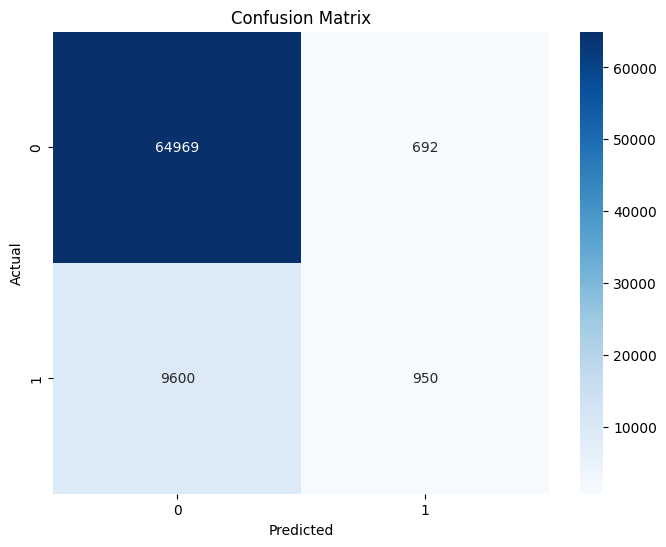

In [ ]:
# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')  # Use confusion_matrix directly


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.mllib.evaluation import MulticlassMetrics

# Load the dataset
file_path = 'sample_data/diabetes.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# relevant columns for features and the label
data = data.select('Genhlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'Diabetes_binary')


assembler = VectorAssembler(inputCols=['Genhlth', 'HighBP', 'BMI', 'Age', 'HighChol'], outputCol="features")

# Spliting the data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Decision Tree classifier model
dt_classifier = DecisionTreeClassifier(labelCol="Diabetes_binary", featuresCol="features")

# Chain assembler and model in a Pipeline
pipeline = Pipeline(stages=[assembler, dt_classifier])

# Train the model
dt_model = pipeline.fit(train_data)

predictions = dt_model.transform(test_data)

evaluator = BinaryClassificationEvaluator(labelCol="Diabetes_binary")
auc = evaluator.evaluate(predictions)

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_binary", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)

# Print AUC and accuracy
print(f"The AUC for the Decision Tree model is: {auc}")
print(f"The accuracy of the Decision Tree model is: {accuracy * 100:.2f}%")

The AUC for the Decision Tree model is: 0.4504750868301911
The accuracy of the Decision Tree model is: 86.46%


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName('SVMExample').getOrCreate()

feature_columns = [col for col in data.columns if col != 'Diabetes_binary']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_transformed = assembler.transform(data)


final_data = data_transformed.select("features", "Diabetes_binary")

# Split the data into training and test sets
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

# Train the SVM model
lsvc = LinearSVC(featuresCol='features', labelCol='Diabetes_binary', maxIter=10, regParam=0.1)
lsvc_model = lsvc.fit(train_data)

# Predict and evaluate the model
predictions = lsvc_model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Diabetes_binary", rawPredictionCol="prediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)
print("Test Area Under ROC: " + str(auc))

spark.stop()


Test Area Under ROC: 0.5


In [ ]:
#-------------------------------
#CLUSTERING

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors


In [ ]:
spark = SparkSession.builder.appName('KMeansClustering').getOrCreate()


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("KMeansClustering") \
    .getOrCreate()


In [ ]:
data = spark.read.csv('sample_data/diabetes.csv', header=True, inferSchema=True)
data.show()


+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|Diabetes_binary|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|
+---------------+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+
|              0|     1|       1|        1| 40|     1|     0|                   0|           0|     0|      1|                0|            1|          0|      5|      18|      15|       1|  0|  9|        4|     3|
|              0|     0|       0|        0| 25|     1|     0|                   0|           1|     0|      0|                0|            

In [ ]:
from pyspark.sql.functions import mean as _mean, col

for column in data.columns:
    mean_value = data.select(_mean(col(column)).alias('mean')).collect()[0]['mean']
    data = data.na.fill({column: mean_value})


In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans

assembler = VectorAssembler(inputCols=data.columns, outputCol="features")
data_vector = assembler.transform(data)

# Normalize the data
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(data_vector)
data_scaled = scalerModel.transform(data_vector)

# Perform K-means clustering
k = 3
kmeans = KMeans(featuresCol='scaledFeatures', k=k)
model = kmeans.fit(data_scaled)


predictions = model.transform(data_scaled)
print("Cluster Centers: ")
for center in model.clusterCenters():
    print(center)

# Analyze cluster counts
predictions.groupBy('prediction').count().show()


Cluster Centers: 
[0.60718806 1.57945028 1.32392471 5.22699501 4.44077351 1.05974151
 0.18910421 0.43796822 1.72687879 1.25858212 1.99667541 0.24187433
 4.51898052 0.13699923 2.43721162 0.19154908 0.20983868 0.24797558
 1.0470962  3.1712278  4.98130801 2.87939504]
[0.04121574 0.1635634  0.3882145  4.94204517 4.02850323 0.65103652
 0.02645055 0.02674318 2.03228834 1.42901711 2.22923586 0.27763318
 4.36749222 0.24578945 1.83458329 0.28366285 0.15817869 0.05690366
 0.82339627 2.12150287 5.44075422 3.28161036]
[1.01024345 1.36894131 1.21665193 5.15166616 4.75344664 1.23083626
 0.76388621 0.93362122 1.05529175 1.1165361  1.79130618 0.15065549
 4.28471664 0.83135381 3.66576474 1.37220826 2.04501514 2.03296338
 0.72482325 2.93590054 4.50637584 1.97205315]
+----------+------+
|prediction| count|
+----------+------+
|         1|121441|
|         2| 41840|
|         0| 90399|
+----------+------+



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


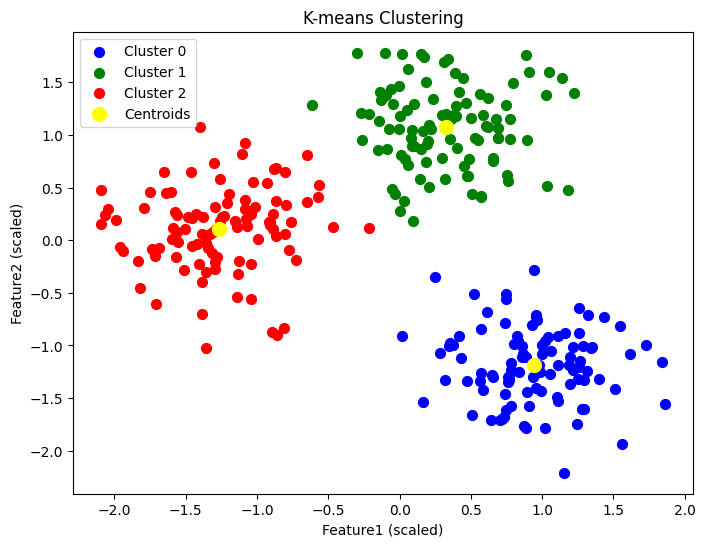

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
data = StandardScaler().fit_transform(X)  # Normalizing the data

# Running K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

#  scatter plot
plt.figure(figsize=(8, 6))

#
colors = ['blue', 'green', 'red']

# Scatter plot for each cluster
for i, color in enumerate(colors):
    plt.scatter(data[labels == i, 0], data[labels == i, 1], s=50, c=color, label=f'Cluster {i}')

# Plotting the centroids
plt.scatter(centers[:, 0], centers[:, 1], s=100, c='yellow', label='Centroids')

plt.xlabel('Feature1 (scaled)')
plt.ylabel('Feature2 (scaled)')
plt.title('K-means Clustering')
plt.legend()
plt.show()


<ipython-input-108-6ca12650d41c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.fillna(data_filtered.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


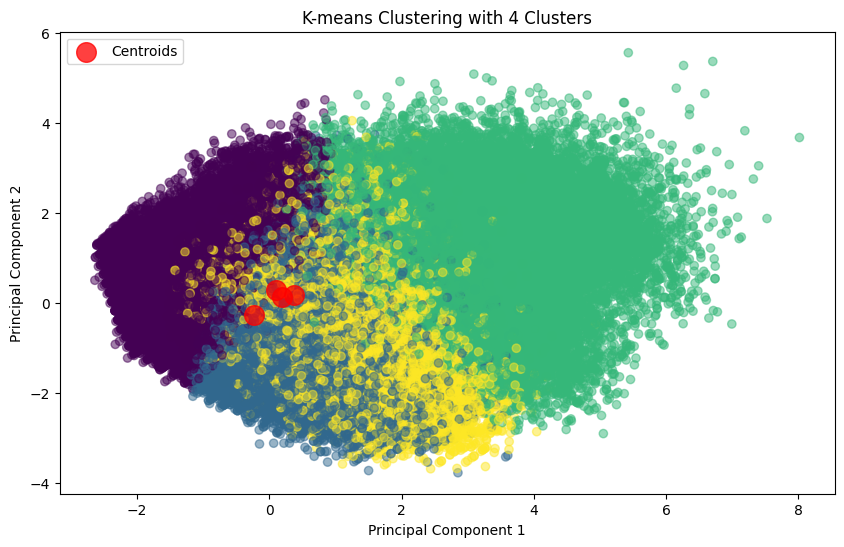

         Diabetes_binary    HighBP  HighChol  CholCheck        BMI    Smoker  \
Cluster                                                                        
0               0.062563  0.295817  0.345104   0.960976  26.807298  0.348039   
1               0.175997  0.520416  0.466076   0.963993  29.092823  0.505604   
2               0.298597  0.635852  0.581033   0.975467  30.860204  0.604499   
3               0.173686  0.497699  0.458494   0.956497  29.673903  0.486975   

           Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  ...  \
Cluster                                                          ...   
0        0.014525              0.041898      0.997677  0.702095  ...   
1        0.047280              0.115224      0.999952  0.633951  ...   
2        0.117558              0.232336      0.501422  0.560864  ...   
3        0.044545              0.102961      0.000000  0.515348  ...   

         AnyHealthcare  NoDocbcCost   GenHlth   MentHlth   PhysHlth  DiffWalk  \
Clust

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('sample_data/diabetes.csv')

# Selecting the columns that will give meaningful insights
selected_features = ['BMI', 'Age', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

data_filtered = data[selected_features]

# Handling missing values - replacing them with the mean of the column
data_filtered.fillna(data_filtered.mean(), inplace=True)

# Scaling the data to prepare for K-means clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filtered)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Adding the cluster labels to our DataFrame
data['Cluster'] = labels

# Summary of our clusters
cluster_summary = data.groupby('Cluster').mean()

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', alpha=0.75)
plt.title('K-means Clustering with 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display the cluster summary
print(cluster_summary)
